# Cars selling

##### Made by: Pavlo Kukurik, Sviatoslav Sharak

## **DATA DESCRIPTION**
#### Description of the dataset columns

1. **`Year:`** The manufacturing year of the vehicle (e.g., 2015) <br>
2. **`Make:`** The brand or manufacturer of the vehicle (e.g., Kia, BMW, Volvo) <br>
3. **`Model`:** The specific model of the vehicle (e.g., Sorento, 3 Series, S60, 6 Series Gran Coupe) <br>
4. **`Trim`:** Additional designation for a particular version or option package of the model (e.g., LX, 328i SULEV, T5, 650i) <br>
5. **`Body`:** The type of vehicle body (e.g., SUV, Sedan) <br>
6. **`Transmission`:** The type of transmission in the vehicle (e.g., automatic) <br>
7. **`VIN:`** The Vehicle Identification Number, a unique code used to identify individual motor vehicles <br>
8. **`State`:** The state in which the vehicle is located or registered (e.g., CA for California) <br>
9. **`Condition`:** A numerical representation of the condition of the vehicle (e.g., 5.0) <br>
10. **`Odometer`:** The mileage or distance traveled by the vehicle <br>
11. **`Color`:** The exterior color of the vehicle <br>
12. **`Interior`:** The interior color of the vehicle <br>
13. **`Seller`:** The entity or company selling the vehicle (e.g., Kia Motors America Inc, Financial Services Remarketing) <br>
14. **`MMR`:** Manheim Market Report, a pricing tool used in the automotive industry <br>
15. **`Selling Price:`** The price at which the vehicle was sold <br>
16. **`Sale Date:`** The date and time when the vehicle was sold <br>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv')
df.head(1000)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2012,Ford,Escape,Limited,SUV,automatic,1fmcu0e7xckc08558,ca,47.0,30843.0,white,beige,ford motor credit company llc pd,15750.0,16000.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
996,2012,Dodge,Grand Caravan,American Value Package,Minivan,automatic,2c4rdgbgxcr138394,ca,44.0,97805.0,silver,black,wheels exchange llc,7975.0,8900.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
997,2012,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pf5sc5c7318718,ca,42.0,26691.0,white,gray,ge fleet services for itself/servicer,10450.0,11500.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
998,2012,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcg2cr308102,ca,29.0,54064.0,black,beige,tdaf remarketing,10650.0,11750.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### **Firstly Let`s clean our dataset**

In [4]:
# First let`s drop useless columns (vin, seller).
if 'vin' in df.columns:
    df = df.drop(columns='vin')
    
if 'seller' in df.columns:
    df = df.drop(columns='seller')
    
df = df.dropna()

In [5]:
# Let`s check how many values in each column are NaM
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [6]:
# # Delete all NaN rows from dataset
# df = df.dropna()
# # Here we can see how df has changed 
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


#### Now when we clear our dataset from Nan values and useless columns let`s see some interesting information that consider this dataset

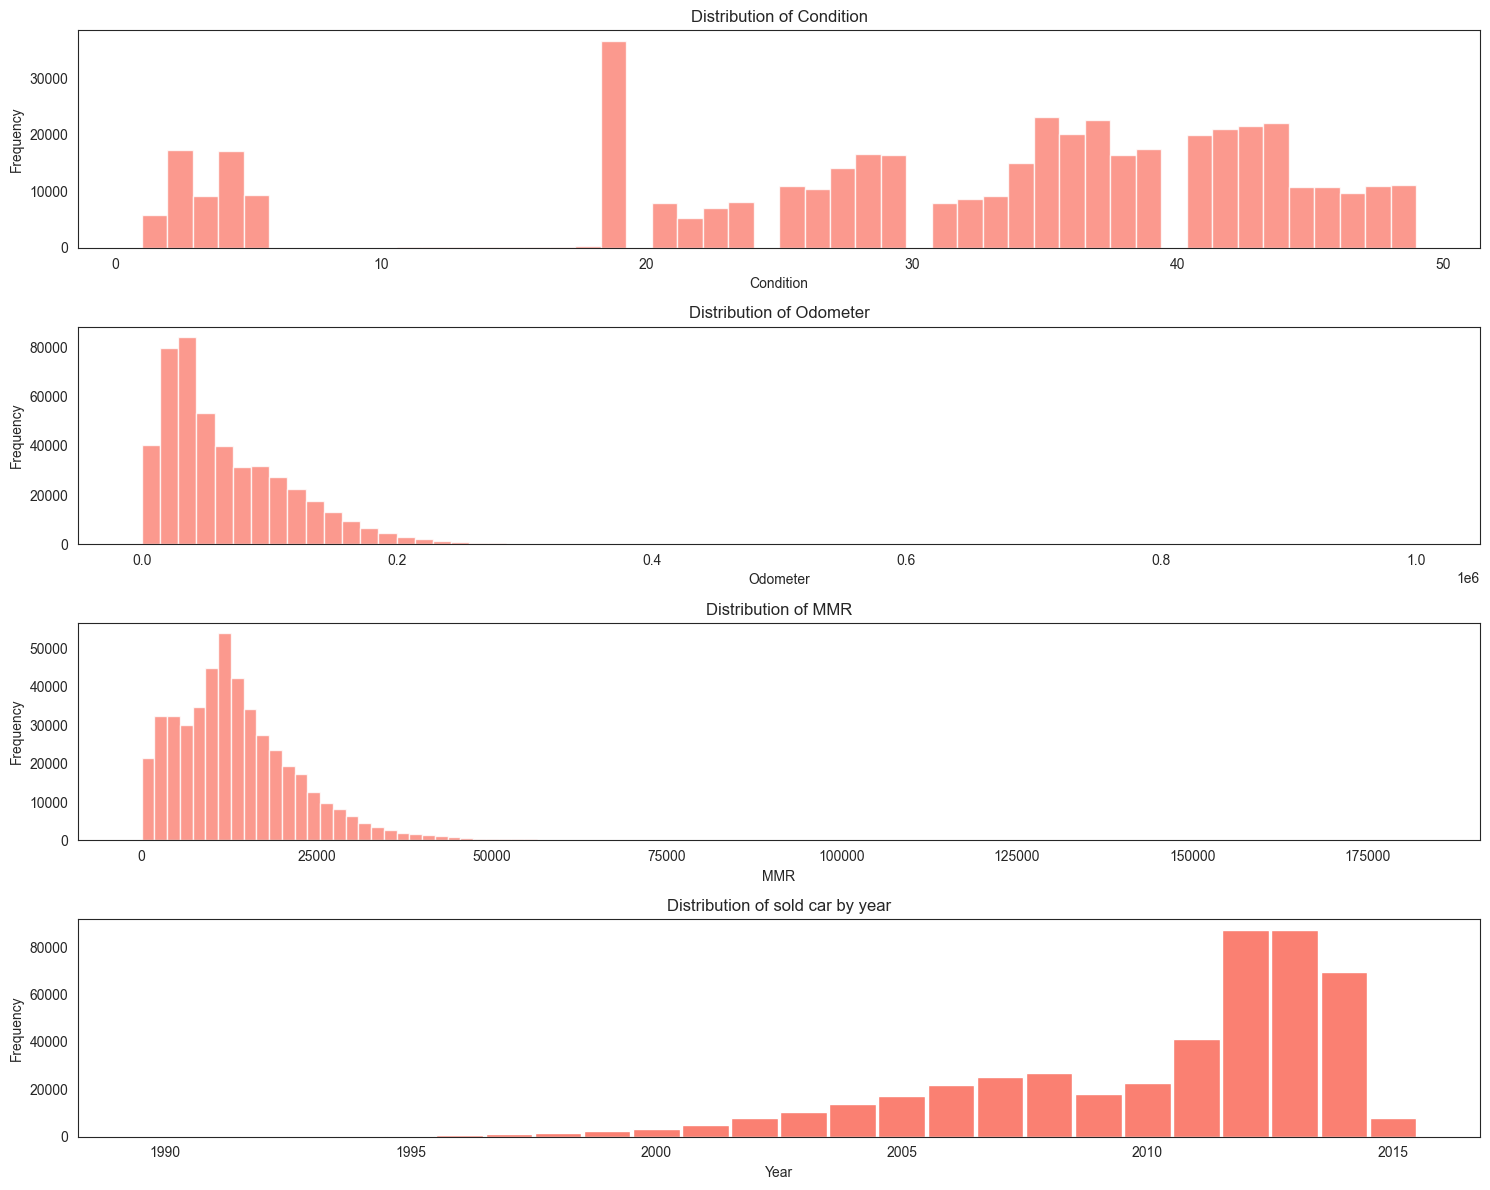

In [26]:
# plt.style.use('seaborn-white')
plt.figure(figsize=(15, 12))

# Plot histogram for 'condition'
plt.subplot(4, 1, 1)
plt.hist(df['condition'], bins=50, color='salmon', alpha=0.8)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')

# Plot histogram for 'odometer'
plt.subplot(4, 1, 2)
plt.hist(df['odometer'], bins=70, color='salmon', alpha=0.8)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')

# Plot histogram for 'mmr'
plt.subplot(4, 1, 3)
plt.hist(df['mmr'], bins=100, color='salmon', alpha=0.8)
plt.title('Distribution of MMR')
plt.xlabel('MMR')
plt.ylabel('Frequency')

# Plot histogram for 'year'
cars_sold_by_year = df['year'].value_counts().sort_index()

plt.subplot(4, 1, 4)
plt.bar(cars_sold_by_year.index, cars_sold_by_year.values, color='salmon', width=0.95)
plt.title('Distribution of sold car by year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')


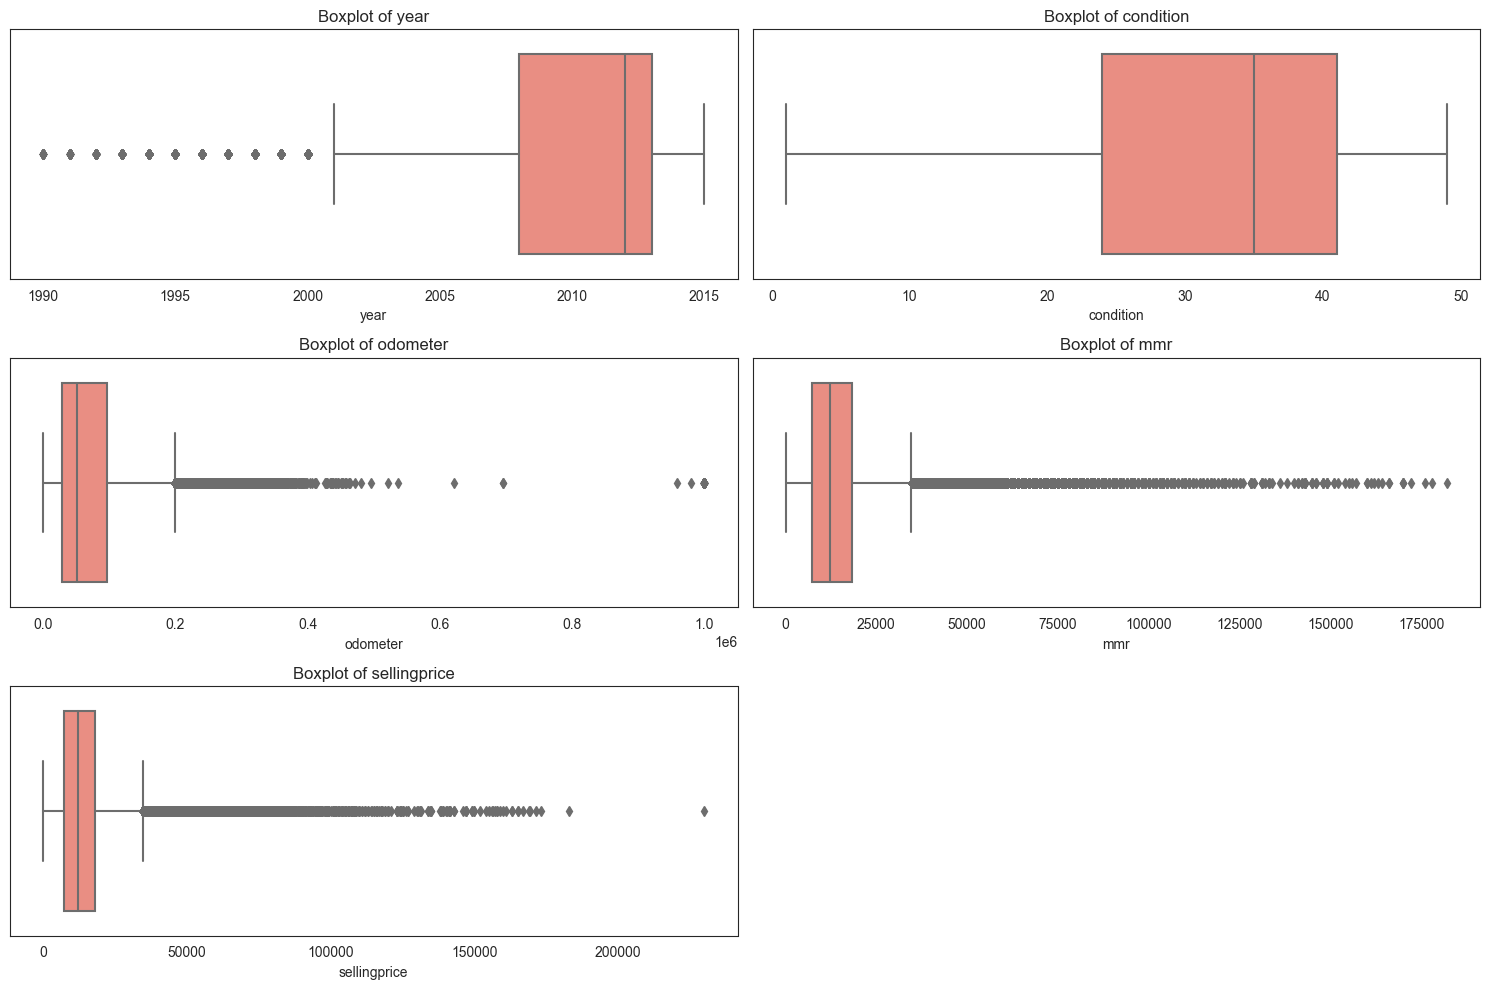

In [27]:
# Let visualise boxplot to see outliers for each numeric columns
sns.set_style("white")

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i+1)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
plt.tight_layout()
plt.show()

In [28]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Clip the dataframe to remove outliers
df_clipped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Count the number of outliers for each column
outliers_count = ((df.select_dtypes(include=['float64', 'int64']) < lower_bound) | (df.select_dtypes(include=['float64', 'int64']) > upper_bound)).sum()

# Print the number of outliers for each column
print("Number of outliers for each numerical column:")
print(outliers_count)

Number of outliers for each numerical column:
year             9799
condition           0
odometer         9029
mmr             14038
sellingprice    14118
dtype: int64


In [29]:
df.isna()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
saledate        0
dtype: int64

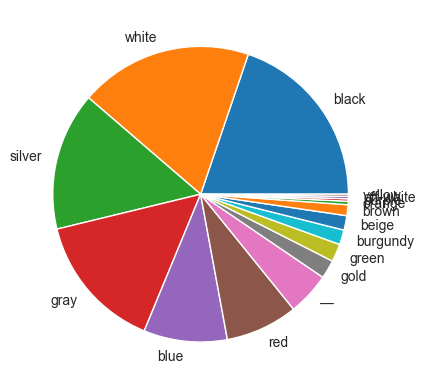

black        93244
white        89233
silver       71251
gray         70640
blue         43060
red          37336
—            22068
gold          9563
green         9234
burgundy      7605
beige         7444
brown         5621
orange        1763
purple        1270
off-white     1244
yellow        1079
Name: color, dtype: int64

In [11]:
filtered_df_color = df[df['color'].map(df['color'].value_counts()) >= 1000]

colors_amount = filtered_df_color['color'].value_counts()
color_name = filtered_df_color['color'].value_counts().index.tolist()

plt.pie(colors_amount, labels=color_name)
plt.show()

colors_amount

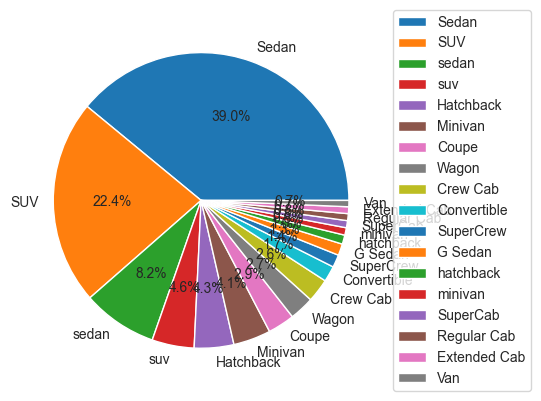

344905


year                                               2014
make                                               Ford
model                                            Escape
trim                                           Titanium
body                                                SUV
transmission                                  automatic
state                                                mo
condition                                          43.0
odometer                                        27802.0
color                                             green
interior                                            tan
mmr                                             22800.0
sellingprice                                   230000.0
saledate        Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
Name: 344905, dtype: object

In [12]:

filtered_df = df[df['body'].map(df['body'].value_counts()) >= 3000]

body_categories = filtered_df['body'].value_counts()
body_name = body_categories.index.tolist()

plt.pie(body_categories, labels=body_name, autopct='%1.1f%%')

# Визначення положення легенди поза графіком
plt.legend(body_name, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()
index_of_max_price = df['sellingprice'].idxmax()
print(index_of_max_price)

# Виводимо весь рядок, що відповідає цьому індексу
car_with_max_price = df.loc[index_of_max_price]
car_with_max_price